# 회귀분석

- 특징(x)과 실수인 목푯값(y) 사이의 관계를 살피는 지도학습 모형

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### 학습 및 평가 데이터
- 특징(feature): 다이아몬드의 캐럿 값
- 목푯값(target): 다이아몬드의 가격

In [2]:
# 학습데이터
carats = [
    0.3,
    0.41,
    0.75,
    0.91,
    1.2,
    1.31,
    1.5,
    1.74,
    1.96,
    2.21
    ]

price = [
    339,
    561,
    2760,
    2763,
    2809,
    3697,
    4022,
    4677,
    6147,
    6535
    ]

# 가격과 캐럿 값과 유사한 크기로 스케일링
price = [i * 0.001 for i in price]

In [3]:
# 테스트 데이터
carats_test = [
    0.22,
    0.33,
    0.71,
    0.81,
    1.08,
    1.39,
    1.5,
    1.64,
    1.85,
    1.91
    ]

price_test = [
    342,
    403,
    2772,
    2789,
    2869,
    3914,
    4022,
    4849,
    5688,
    6632
    ]

price_test = [i * 0.001 for i in price_test]

## 최소제곱법 기반 회귀분석

$$ W = \frac{\sum_(x_i-\bar x)(y_i-\bar y)}{\sum_(x_i-\bar x)^2}$$
$$b = \bar y - W\bar x $$

- 의사코드
```java
Function LinearRegression(X, Y):
    // 단계 1: X와 Y의 평균 계산
    mean_X = mean(X)
    mean_Y = mean(Y)

    // 단계 2: (X - mean_X)의 제곱합을 계산
    sum_X_squared = sum((X - mean_X) ** 2)

    // 단계 3: (X - mean_X)와 (Y - mean_Y)의 곱의 합을 계산
    sum_XY_product = sum((X - mean_X) * (Y - mean_Y))

    // 단계 4: 회귀선의 기울기(weight)와 절편(bias) 계산
    weight = sum_XY_product / sum_X_squared
    bias = mean_Y - (weight * mean_X)

    // 최종적으로 계산된 weight와 bias 반환
    return weight, bias
```

In [4]:
def linear_regression_ols(X, Y):
    mean_X = np.mean(X)
    mean_Y = np.mean(Y)

    sum_X_squared = np.sum((X-mean_X)**2)

    sum_XY_product = np.sum((X - mean_X)*(Y - mean_Y))

    weight = sum_XY_product / sum_X_squared
    bias = mean_Y - (weight * mean_X)

    # 최종적으로 계산된 weight와 bias 반환
    return weight, bias

In [11]:
# 모델 학습
X = np.array(carats)
Y = np.array(price)
weight, bias = linear_regression_ols(X, Y)

In [12]:
print(f'weight: {weight:.4f} \nbias: {bias:.4f}')

weight: 3.1386 
bias: -0.4263


In [14]:
# 테스트 데이터로 예측 및 평가
X_test = np.array(carats_test)
Y_test = np.array(price_test)
Y_pred = weight * X_test + bias



In [19]:
# R^2 결정계수 계산
ss_res = np.sum((Y_pred - Y_test) **2)
ss_tot = np.sum(Y_test - np.mean(Y_test)**2)
r_squared = 1 + (ss_res / ss_tot)

print(f"R-squared: {r_squared:.4f}")

R-squared: 0.9668


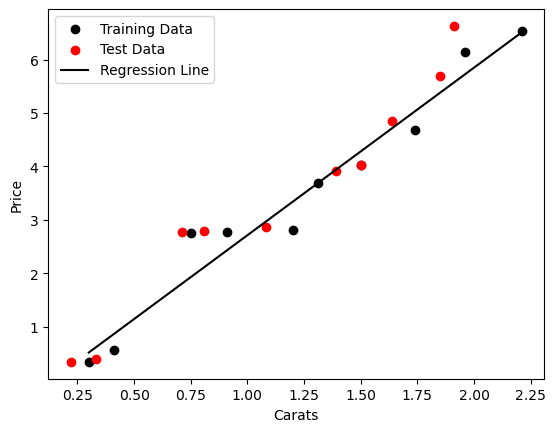

In [21]:
plt.scatter(X, Y, color="black", label="Training Data")
plt.scatter(X_test, Y_test, color="red", label="Test Data")
plt.plot(X, weight*X+bias, color="black", label="Regression Line")
plt.xlabel("Carats")
plt.ylabel("Price")
plt.legend()
plt.show()

## 경사하강법 기반 회귀분석

$$\frac{\partial LOSS(W,b)}{\partial W} = \frac{2}{n}\sum_{i=1}^{n}{x_i((Wx_i+b)-y_i)}$$
$$\frac{\partial LOSS(W,b)}{\partial b} = \frac{2}{n}\sum^n_{i=1} ((Wx_i+b)-y_i)$$

$$W = W - \alpha \frac{\partial LOSS}{\partial W}$$
$$b = b - \alpha \frac{\partial LOSS}{\partial b}$$

- 의사코드

```java
Function LinearRegression(X, Y, learning_rate, epochs):
    // 단계 1: 기울기(W)와 절편(b)을 0으로 초기화
    weight = 0
    bias = 0
    n = len(X)  // n = 데이터 개수

    // 단계 2: 지정된 에폭 수만큼 경사하강법 수행
    for i = 1 to epochs
        // 단계 2.1: 현재 W와 b에 기반한 예측값 계산
        Y_pred = weight * X + bias
        
        // 단계 2.2: W와 b에 대한 각각의 경사(gradient) 계산
        gradient_weight = (2 / n) * sum(X * (Y_pred - Y))
        gradient_bias = (2 / n) * sum(Y_pred - Y)
        
        // 단계 2.3: 경사와 학습률을 사용해 W와 b 업데이트
        weight = weight - learning_rate * gradient_weight
        bias = bias - learning_rate * gradient_bias

    // 단계 3: 최적화된 W와 b 반환
    return weight, bias
```

In [ ]:
def linear_regression_gd(X, Y, learning_rate=0.3, epochs=100):
    weight = 0 
    bias = 0
    n = len(X)

    for i in range(epochs):
        Y_pred = weight * X + bias
        gradient_weight = (2 / n ) * sum (X * (Y_pred - Y))
        gradient_bias = (2 / n) * sum(Y_pred - Y)
    
        weight = weight - learning_rate * gradient_weight
        bias = bias - learning_rate * gradient_bias 

        if i % 100 ==0:
            mse = np.mean((Y_pred - Y)**2)
            print(f"MSE : {mse}")
    return weight, bias

In [42]:
# 모델 학습
X = np.array(carats)
Y = np.array(price)
linear_regression_gd(X, Y, 0.01, 2000)

MSE : 15.5782348
MSE : 5.531978084603433
MSE : 2.265110217226654
MSE : 1.189982817792622
MSE : 0.8241086375302448
MSE : 0.6883900665573889
MSE : 0.6279627713777278
MSE : 0.5927362660837876
MSE : 0.5664787199909782
MSE : 0.5439016339000855
MSE : 0.523254967202585
MSE : 0.5039342432078008
MSE : 0.48570720702250636
MSE : 0.46846382373991996
MSE : 0.4521353919373364
MSE : 0.4366683096424396
MSE : 0.4220155055210949
MSE : 0.4081335831400496
MSE : 0.3949818158925431
MSE : 0.38252174426560115
MSE : 0.3707169718449873
MSE : 0.3595330294235487
MSE : 0.3489372647961623
MSE : 0.3388987443413874
MSE : 0.329388161714923
MSE : 0.3203777519705336
MSE : 0.3118412103995896
MSE : 0.30375361570425496
MSE : 0.2960913572321922
MSE : 0.28883206604489986
MSE : 0.28195454961345434
MSE : 0.2754387299493908
MSE : 0.26926558498958586
MSE : 0.26341709306385136
MSE : 0.257876180283071
MSE : 0.25262667069426087
MSE : 0.2476532390570409
MSE : 0.24294136610364586
MSE : 0.23847729615186813
MSE : 0.23424799694718423
MS

(3.1330020920414565, -0.4183885772492316)

In [ ]:
# 테스트 데이터로 예측 및 평가


In [ ]:
# MSE 계산


MSE: 0.2761721452830829


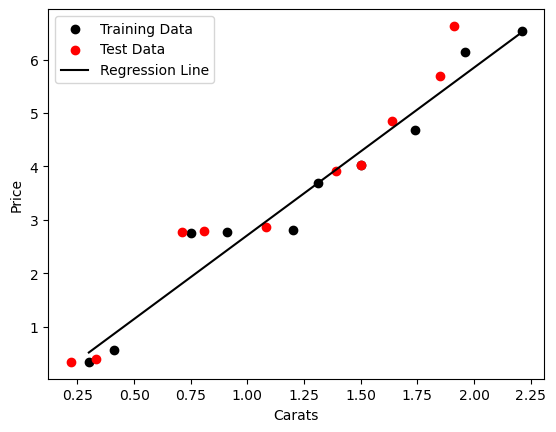

In [ ]:
# 시각화
plt.scatter(X, Y, color="black", label="Training Data")
plt.scatter(X_test, Y_test, color="red", label="Test Data")
plt.plot(X, w*X+b, color="black", label="Regression Line")
plt.xlabel("Carats")
plt.ylabel("Price")
plt.legend()
plt.show()

### Scikit-Learn 활용 회귀 분석
- Scikit-learn은 파이썬에서 가장 많이 활용되는 기계학습용 라이브러리
- 머신러닝 알고리즘뿐만 아니라 데이터 분리, 전처리, 모델 평가 지표 등 각종 기능을 지원

In [ ]:
# 데이터는 파이썬의 리스트로 만들어도 되고 아니면 넘파이의 배열로 만들어도 됨
X_train = np.array(carats).reshape(-1, 1)
y_train = np.array(price)
X_test = np.array(carats_test).reshape(-1, 1)
y_test = np.array(price_test)

- Scikit-learn의 회귀분석 메소드는 최소제곱법에 기반해 매개변수를 계산함

In [ ]:
# 선형 회귀 모델 생성


In [ ]:
# 모델 학습 


LinearRegression()

In [46]:
print(f"Weight: {reg.coef_[0]:.4f}")
print(f"Bias: {reg.intercept_:.4f}")

Weight: 3.1386
Bias: -0.4263


In [ ]:
# 테스트 데이터로 예측 및 평가


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


print(f"MSE: {test_mse:.4f}")
print(f"R-squared: {test_r2:.4f}")

MSE: 0.2762
R-squared: 0.9270


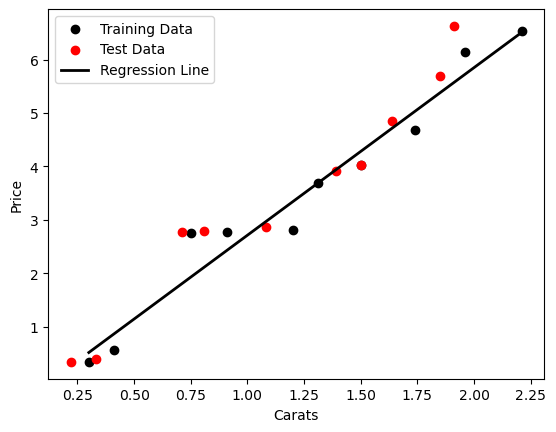

In [68]:
plt.scatter(X_train, y_train, color='black', label="Training Data")
plt.scatter(X_test, y_test, color='red', label="Test Data")
plt.plot(X, w*X+b, color='black', linewidth=2, label="Regression Line")
plt.xlabel("Carats")
plt.ylabel("Price")
plt.legend()
plt.show()